In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, stats

import utility

In [26]:
# Define the bioassay function
bioassay = pd.DataFrame({
    'x': [-0.86, -0.30, -0.05, 0.73],
    'n': [5, 5, 5, 5],
    'y': [0, 1, 3, 5]
})

In [28]:
# Fit the bioassay model using maximum likelihood estimation
fit = optimize.minimize(utility.bioassayfun, x0=[0, 0], args=(bioassay,))
x = fit['x']
S = fit['hess_inv']
ld50 = -fit.x[0] / fit.x[1]

# Compute the standard errors for the LD50 and the parameters
hessian = np.linalg.inv(fit.hess_inv)
se_ld50 = np.sqrt(hessian[0,0] / fit.x[1]**2)
se_alpha = np.sqrt(hessian[0,0]) * np.sqrt((1/bioassay['n'].sum()) + (bioassay['x'].min()/bioassay['y'].sum()))
se_beta = np.sqrt(hessian[1,1])

# Compute the confidence intervals for the LD50 and the parameters
# alpha_ci = norm.interval(0.95, loc=fit.x[0], scale=se_alpha)
# beta_ci = norm.interval(0.95, loc=fit.x[1], scale=se_beta)
ld50_ci = norm.interval(0.95, loc=ld50, scale=se_ld50)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22556\3289690875.py:10: RuntimeWarning: invalid value encountered in sqrt
  se_alpha = np.sqrt(hessian[0,0]) * np.sqrt((1/bioassay['n'].sum()) + (bioassay['x'].min()/bioassay['y'].sum()))


Estimates:
LD50 = -0.11
alpha = 0.85, beta = 7.75

Standard errors:
se_LD50 = 0.19
se_alpha = nan, se_beta = 0.30

Confidence intervals:
alpha_95CI = (nan, nan)
beta_95CI = (7.174788182411786, 8.322833262493758)
LD50_95CI = (-0.480488314991292, 0.26198178075522355)


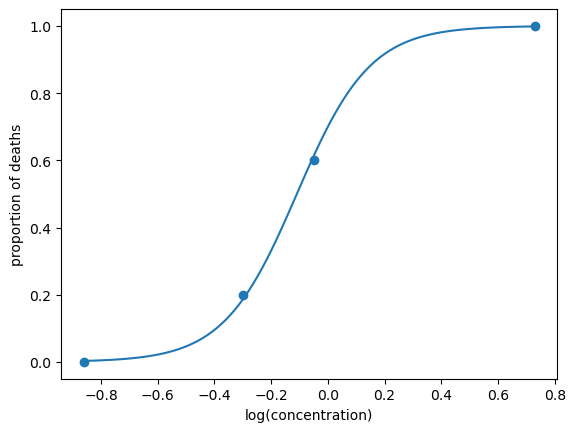

In [29]:
# Print the results
print('Estimates:')
print(f'LD50 = {ld50:.2f}')
print(f'alpha = {fit.x[0]:.2f}, beta = {fit.x[1]:.2f}')
print('\nStandard errors:')
print(f'se_LD50 = {se_ld50:.2f}')
print(f'se_alpha = {se_alpha:.2f}, se_beta = {se_beta:.2f}')
print('\nConfidence intervals:')
print(f'alpha_95CI = {alpha_ci}')
print(f'beta_95CI = {beta_ci}')
print(f'LD50_95CI = {ld50_ci}')

# Plot the fitted curve and the observed data
x_range = np.linspace(bioassay['x'].min(), bioassay['x'].max(), num=100)
y_range = np.exp(fit.x[0] + fit.x[1] * x_range) / (1 + np.exp(fit.x[0] + fit.x[1] * x_range))
plt.plot(x_range, y_range)
plt.scatter(bioassay['x'], bioassay['y'] / bioassay['n'])
plt.xlabel('log(concentration)')
plt.ylabel('proportion of deaths')
plt.show()